### Import 

In [1]:
import pylab
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

### Visualizar uma foto

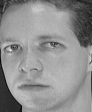

In [2]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s1/6.pgm")

In [3]:
im = plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s1/6.pgm")
im.shape # uma foto possui 112 linhas e 92 colunas

(112, 92)

### Inserindo fotos Lucas

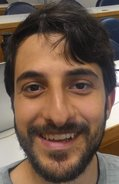

In [4]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/1.jpg")

In [5]:
im = plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/1.jpg")
im.shape

(184, 119, 3)

#### Como as dimensões e o formato estão diferentes vamos modificar pelo terminal 

#### Basta abrir a pasta no terminal e inserir na linha de comando: <span style="color:maroon">convert 1.jpg -resize 92x112! 1.pgm</span>

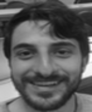

In [6]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/1.pgm")

In [7]:
im = plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/1.pgm")
im.shape

(112, 92)

### Pegar todas as fotos  

#### Pegar 8 fotos do s1, 8 do s2 e assim por diante até o s40

In [8]:
Data = []
for i in range(41):
    for j in range(8):
        Data.append([plt.imread(("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s"+str(i+1)+'/'+str(j+1)+'.pgm'))])

#### Data de [0] a [7] é a primeira pessoa (S1) e assim por diante 

In [9]:
Data[0]

[array([[48, 49, 45, ..., 56, 56, 54],
        [45, 52, 39, ..., 52, 50, 51],
        [45, 50, 42, ..., 48, 53, 50],
        ..., 
        [50, 48, 50, ..., 45, 46, 46],
        [45, 54, 49, ..., 46, 47, 47],
        [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)]

In [10]:
plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s1/1.pgm")

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ..., 
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

### Montar matriz geral

In [11]:
plt.concatenate(plt.concatenate(Data[0]))

array([48, 49, 45, ..., 47, 46, 46], dtype=uint8)

In [12]:
len(plt.concatenate(plt.concatenate(Data[0])))

10304

In [13]:
#112 linhas e 92 colunas -> 10304 linhas e 320 colunas na matriz final 

In [14]:
matriz_geral=[]
for i in range (328):
    matriz_geral.append(plt.concatenate(plt.concatenate(Data[i])))

### Fazer média para todas as 320 colunas (resulta em um vetor de 10304 linhas)

In [15]:
m=np.mean(matriz_geral,axis=0)

In [16]:
m.shape

(10304,)

### Pegar cada coluna e diminuir da media

In [17]:
matriz_menos_media = matriz_geral-m

In [18]:
matriz_menos_media.shape

(328, 10304)

### Fazer o PCA

In [19]:
pca = PCA(n_components=5) # num de componentes = 5

In [20]:
pca.fit(matriz_menos_media)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print(pca.explained_variance_ratio_)

[ 0.1777226   0.12051374  0.08666273  0.05608476  0.047816  ]


In [22]:
pca.components_.shape

(5, 10304)

### Fazer uma imagem a partir de um PCA

In [23]:
x=pca.components_[0]

In [24]:
x

array([ 0.00398724,  0.00395227,  0.0039937 , ...,  0.00801019,
        0.00769396,  0.00859581])

In [25]:
a=np.asmatrix(x)

In [26]:
a=np.reshape(a,(112,92))

In [27]:
a.shape

(112, 92)

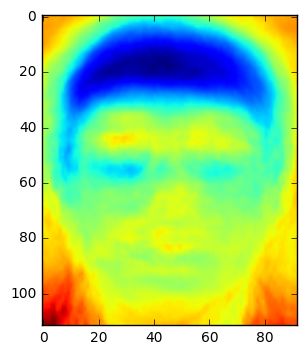

In [28]:
plt.imshow(a)

### Montar matriz com 320 a, depois 320 b e assim por diante 

####  <span style="color:navy">Imagem</span> =   <span style="color:maroon">a</span> \* <span style="color:teal">primeira_componente</span> + <span style="color:maroon">b</span> \* <span style="color:teal">segunda_componente</span> + ... + <span style="color:maroon">e</span> \* <span style="color:teal">quinta_componente</span> 

#### Para achar o <span style="color:maroon">a</span> , basta fazer produto interno da <span style="color:navy">imagem</span> com a <span style="color:teal">primeira componente</span>

In [29]:
prod_inter=[]
for i in range(5):
    for j in range(328):
        x=matriz_geral[j]
        y=pca.components_[i]
        z=np.inner(x,y)
        prod_inter.append(z)

In [30]:
len(prod_inter) #328*5

1640

### Teste para encontrar as letras da função

In [31]:
np.inner(matriz_geral[0],pca.components_[0]) # a

-8876.0504619853764

In [32]:
np.inner(matriz_geral[0],pca.components_[1]) # b

-8568.9776430730853

In [33]:
np.inner(matriz_geral[0],pca.components_[2]) # c

-689.04038453997703

In [34]:
np.inner(matriz_geral[0],pca.components_[3]) # d

1938.6401266125815

In [35]:
np.inner(matriz_geral[0],pca.components_[4]) # e

-3443.460635271259

### Arrumar em uma matriz onde primeira coluna = a, segunda =b ...

In [36]:
a = prod_inter[0:328]
b = prod_inter[328:656]
c = prod_inter[656:984]
d = prod_inter[984:1312]
e = prod_inter[1312:1640]

In [37]:
data_nova = {'a':a,'b':b,'c':c,'d':d,'e':e} # tem que fazer transposta 

#### pd.DataFrame

In [38]:
frame = pd.DataFrame(data_nova)
frame

,a,b,c,d,e
0,-8876.050462,-8568.977643,-689.040385,1938.640127,-3443.460635
1,-10131.265420,-8325.179367,2224.503194,2393.050509,-4750.653311
2,-10045.889271,-7988.260681,55.331334,1470.748016,-3704.955761
3,-10348.201338,-8667.898159,1915.230945,3008.455944,-1855.144233
4,-10833.562112,-8382.023114,1519.007587,2745.423483,-2245.326603
5,-9656.704815,-8621.600749,1733.799350,2716.635970,-3802.449720
6,-9653.610340,-8274.717821,385.643483,2411.447157,-3530.885060
7,-10103.217136,-7964.954434,315.477900,2573.682366,-979.844545
8,-8345.186136,-6704.222600,-511.466280,1803.645634,-2670.631936
9,-8245.524507,-6814.667700,-807.269456,1521.307384,-3336.448591


### Criando label (inserir uma coluna)

In [39]:
labels = []
for i in range(41):
    for _ in range(8):
        labels.append(i)

In [40]:
frame = pd.DataFrame(frame)
frame['labels'] = labels
frame

,a,b,c,d,e,labels
0,-8876.050462,-8568.977643,-689.040385,1938.640127,-3443.460635,0
1,-10131.265420,-8325.179367,2224.503194,2393.050509,-4750.653311,0
2,-10045.889271,-7988.260681,55.331334,1470.748016,-3704.955761,0
3,-10348.201338,-8667.898159,1915.230945,3008.455944,-1855.144233,0
4,-10833.562112,-8382.023114,1519.007587,2745.423483,-2245.326603,0
5,-9656.704815,-8621.600749,1733.799350,2716.635970,-3802.449720,0
6,-9653.610340,-8274.717821,385.643483,2411.447157,-3530.885060,0
7,-10103.217136,-7964.954434,315.477900,2573.682366,-979.844545,0
8,-8345.186136,-6704.222600,-511.466280,1803.645634,-2670.631936,1
9,-8245.524507,-6814.667700,-807.269456,1521.307384,-3336.448591,1


### Nova foto (mostrando alguns erros) 

In [41]:
nova_foto = plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/10.pgm")
nova_foto=plt.concatenate(nova_foto)
new_dado = pca.transform(nova_foto)
new_dado

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-6250.21161388, -7412.57948575,  5685.49068144,  -207.78346521,
        -4805.31598277]])

In [42]:
x = np.array(frame.drop(['labels'],1))
y = x - new_dado
y = np.sum(y**2,axis=1)
y = list(y)
v = y.index(min(y))//8+1
v

41

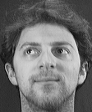

In [43]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s7/9.pgm") #acerta 

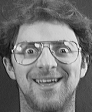

In [44]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s7/10.pgm") #erra

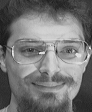

In [45]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s17/1.pgm") #confundiu com esse

### Com as fotos do Lucas na base de teste

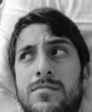

In [46]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/10.pgm") #acerta 

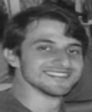

In [47]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s41/9.pgm") #erra

## Calcular a accuracy 

#### Montar matriz geral com os dados do teste 

In [48]:
Data = []
for i in range(41):
    for j in range(8,10):
        Data.append([plt.imread(("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s"+str(i+1)+'/'+str(j+1)+'.pgm'))])

In [49]:
Data[0]

[array([[42, 41, 44, ..., 50, 49, 57],
        [41, 41, 43, ..., 51, 53, 53],
        [54, 40, 43, ..., 49, 52, 53],
        ..., 
        [38, 37, 36, ..., 40, 43, 40],
        [38, 36, 37, ..., 44, 42, 39],
        [37, 39, 37, ..., 42, 43, 41]], dtype=uint8)]

In [50]:
matriz_geral=[]
for i in range (82):
    matriz_geral.append(plt.concatenate(plt.concatenate(Data[i])))

In [51]:
matriz_geral[0]

array([42, 41, 44, ..., 42, 43, 41], dtype=uint8)

#### Achar o a,b,c,d,e de todas as fotos no teste

In [52]:
%%capture
append_resultados=[]
for i in range(82):
        x=pca.transform(matriz_geral[i])
        append_resultados.append(x)

#### Calcular a coluna resultado

In [53]:
x = np.array(frame.drop(['labels'],1))
append_index=[]
for i in range (82):
    y = x - append_resultados[i]
    y = np.sum(y**2,axis=1)
    y = list(y)
    v = y.index(min(y))//8
    append_index.append(v)

#### Calcular a coluna 0

In [54]:
labels = []
for i in range(41):
    for _ in range(2):
        labels.append(i)

#### Montar a dataframe chamada base_comparacao

In [55]:
base_comparacao = pd.DataFrame(labels)
base_comparacao['resultado'] = append_index

In [56]:
nova_coluna=base_comparacao.where(base_comparacao[0]==base_comparacao["resultado"],"erro")
base_comparacao['nova_coluna'] = nova_coluna[0]
base_comparacao

,0,resultado,nova_coluna
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,2,3,erro
5,2,2,2
6,3,3,3
7,3,3,3
8,4,4,4
9,4,4,4


In [57]:
base_comparacao[base_comparacao['nova_coluna'] == 'erro'].count()

0              17
resultado      17
nova_coluna    17
dtype: int64

In [58]:
17/82 

0.2073170731707317

### Com a base de dados, método e número de componentes principais escolhidos, foi possível obter 80% de acerto. 

## FIM  : )